# Module Import

In [1]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Define Function

In [2]:
# encoder 함수 지정
def encoder(data, kind):
    # 범주형 변수와 수치형 변수를 분리
    cat_features = data.select_dtypes(include=['object']).columns.to_list()
    num_features = data.select_dtypes(exclude='object').columns.to_list() 
    if kind == 'onehot':
        # 원핫인코딩
        data_cat = pd.get_dummies(data[cat_features])
        data = pd.concat([data,data_cat],axis=1).drop(columns=[f for f in cat_features])
        return data
    elif kind == 'label':
        # 라벨인코딩
        for c in cat_features:
            data[c]=pd.Categorical(data[c]).codes
        return data
    else:
        print('choose "onehot"or "label"')

# Data Load

In [3]:
data = pd.read_excel('../alldata/data.xlsx')
data

,예약번호,미리예약,업체코드,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,...,결제수단,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로
0,2106010253056409,N,3020678,제주 갤러리호텔 비,숙박,25평 패밀리,2021-06-01 02:05:32,2021-06-01,2021-06-02,회원,...,BANK,80000,76000,6월게하선착순쿠폰_G,4000,0,0,예약완료,NaN,APP_Y
1,2106010253056528,Y,1009966,부산 세리인 게스트하우스,숙박,4인 남성 도미토리,2021-06-01 02:08:58,2021-06-05,2021-06-06,비회원,...,OTA,23000,23000,NaN,0,0,0,예약완료,NaN,AGODA
2,2106010253056977,N,3014924,제주공항 싱글스토리 게스트하우스,숙박,"1-2인실 (1인기준, 1인추가시 추가요금발생)",2021-06-01 02:26:25,2021-06-01,2021-06-02,비회원,...,OTA,27000,27000,NaN,0,0,0,예약완료,NaN,AGODA
3,2106010253057415,Y,3014191,제주 아모르 하우스,숙박,2인실 A동,2021-06-01 02:44:38,2021-06-22,2021-06-23,회원,...,KAKAOPAY,45000,42393,NaN,0,807,1800,예약완료,NaN,APP_Y
4,2106010353057929,Y,3000536,해운대 캔버스 호스텔,연박,남성 4인 도미토리,2021-06-01 03:13:58,2021-06-03,2021-06-05,회원,...,KAKAOPAY,26000,26000,NaN,0,0,0,예약완료,NaN,APP_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112693,2202070130140028,Y,10040765,을지로 레몬 게스트하우스,숙박,디럭스,2022-02-07 01:30:25,2022-02-17,2022-02-18,회원,...,NAVERPAY,38000,38000,NaN,0,0,0,예약완료,NaN,APP_Y
112694,2202070131500008,Y,3010590,부산 K79 게스트하우스,숙박,거리두기 - 단독이용,2022-02-07 01:31:06,2022-02-18,2022-02-19,회원,...,KAKAOPAY,35000,35000,NaN,0,0,0,예약완료,NaN,APP_Y
112695,2202070132630110,Y,1020536,제주 미소 게스트하우스,숙박,4인 남성 도미토리,2022-02-07 01:32:54,2022-02-08,2022-02-09,회원,...,NAVERPAY,19000,19000,NaN,0,0,0,고객취소,NaN,APP_Y
112696,2202070148480006,Y,1000114395,제주 아버지의바다,연박,하르방,2022-02-07 01:48:09,2022-03-07,2022-03-09,비회원,...,CARD,149000,149000,NaN,0,0,0,고객취소,NaN,APP_Y


# Data Information

In [4]:
data.head()

,예약번호,미리예약,업체코드,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,...,결제수단,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로
0,2106010253056409,N,3020678,제주 갤러리호텔 비,숙박,25평 패밀리,2021-06-01 02:05:32,2021-06-01,2021-06-02,회원,...,BANK,80000,76000,6월게하선착순쿠폰_G,4000,0,0,예약완료,NaN,APP_Y
1,2106010253056528,Y,1009966,부산 세리인 게스트하우스,숙박,4인 남성 도미토리,2021-06-01 02:08:58,2021-06-05,2021-06-06,비회원,...,OTA,23000,23000,NaN,0,0,0,예약완료,NaN,AGODA
2,2106010253056977,N,3014924,제주공항 싱글스토리 게스트하우스,숙박,"1-2인실 (1인기준, 1인추가시 추가요금발생)",2021-06-01 02:26:25,2021-06-01,2021-06-02,비회원,...,OTA,27000,27000,NaN,0,0,0,예약완료,NaN,AGODA
3,2106010253057415,Y,3014191,제주 아모르 하우스,숙박,2인실 A동,2021-06-01 02:44:38,2021-06-22,2021-06-23,회원,...,KAKAOPAY,45000,42393,NaN,0,807,1800,예약완료,NaN,APP_Y
4,2106010353057929,Y,3000536,해운대 캔버스 호스텔,연박,남성 4인 도미토리,2021-06-01 03:13:58,2021-06-03,2021-06-05,회원,...,KAKAOPAY,26000,26000,NaN,0,0,0,예약완료,NaN,APP_Y


In [5]:
data.shape

(112698, 22)

In [6]:
data.columns

Index(['예약번호', '미리예약', '업체코드', '업체명', '상품', '객실타입', '예약일시', '투숙일', '퇴실일',
       '회원구분', '예약자', '핸드폰', '결제수단', '판매금액', '결제금액', '쿠폰명', '쿠폰금액', '포인트금액',
       '제휴사할인금액', '상태', '유입', '경로'],
      dtype='object')

In [7]:
data.nunique()

예약번호       112698
미리예약            2
업체코드         1418
업체명          1468
상품              2
객실타입         4006
예약일시       110050
투숙일           305
퇴실일           306
회원구분            2
예약자         10756
핸드폰         10092
결제수단           20
판매금액         1115
결제금액         3317
쿠폰명            62
쿠폰금액          213
포인트금액        1136
제휴사할인금액       248
상태              3
유입             12
경로             37
dtype: int64

# Data Preprocess

In [8]:
df = data[['미리예약', '업체명', '상품', '객실타입', '예약일시', '투숙일', '퇴실일',
       '회원구분', '예약자', '핸드폰', '결제수단', '판매금액', '결제금액', '쿠폰명', '쿠폰금액', '포인트금액',
       '제휴사할인금액', '상태', '유입', '경로']]

df['customer'] = df['예약자']+'_'+df['핸드폰'].apply(lambda x: x[-4:]) # 고객 정보를 예약자이름과 핸드폰 번호를 통해 연결
df['예약일시'] = df['예약일시'].apply(lambda x: x[:10]) # 예약일시에서 연,월,일만 추출
df = df[df['상태']=='예약완료'] # 예약이 완료된 건에만 데이터분석

C:\Users\zyunhyeok\AppData\Local\Temp\ipykernel_3896\1437527274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer'] = df['예약자']+'_'+df['핸드폰'].apply(lambda x: x[-4:]) # 고객 정보를 예약자이름과 핸드폰 번호를 통해 연결
C:\Users\zyunhyeok\AppData\Local\Temp\ipykernel_3896\1437527274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['예약일시'] = df['예약일시'].apply(lambda x: x[:10]) # 예약일시에서 연,월,일만 추출


# Data Visualize

- 미리예약

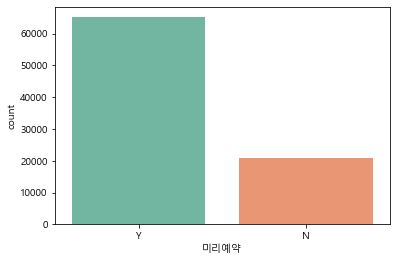

In [9]:
sns.countplot(x='미리예약', data=df, palette='Set2', order = df['미리예약'].value_counts().index)
plt.show()

- 상품

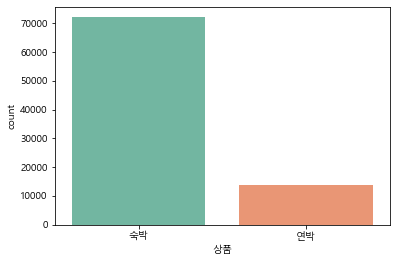

In [10]:
sns.countplot(x='상품', data=df, palette='Set2', order = df['상품'].value_counts().index)
plt.show()

- 회원구분

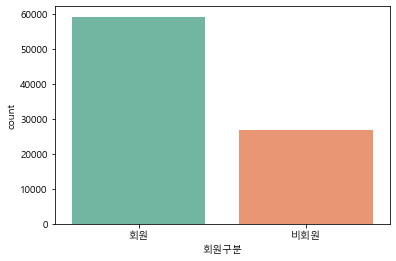

In [11]:
sns.countplot(x='회원구분', data=df, palette='Set2', order = df['회원구분'].value_counts().index)
plt.show()

- 결제수단

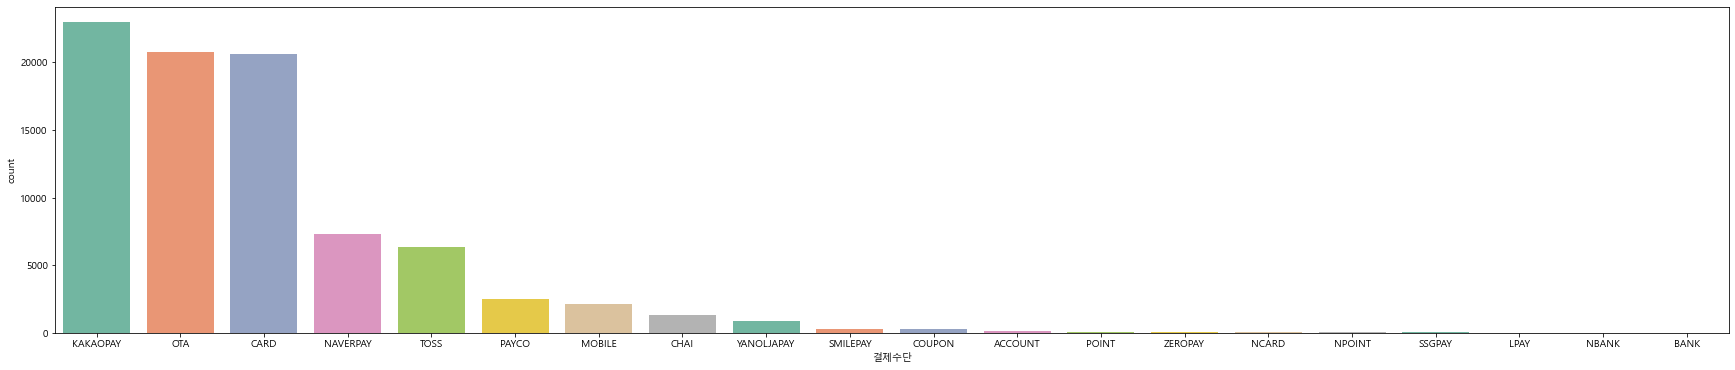

In [12]:
plt.figure(figsize=(30,6))
sns.countplot(x='결제수단', data=df, palette='Set2', order = df['결제수단'].value_counts().index)
plt.show()

- 상태

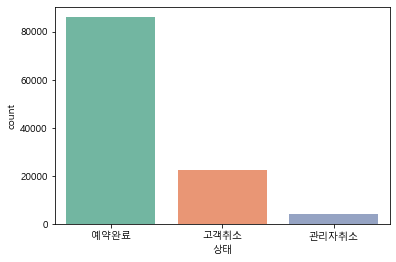

In [13]:
sns.countplot(x='상태', data=data, palette='Set2', order = data['상태'].value_counts().index)
plt.show()

- 유입

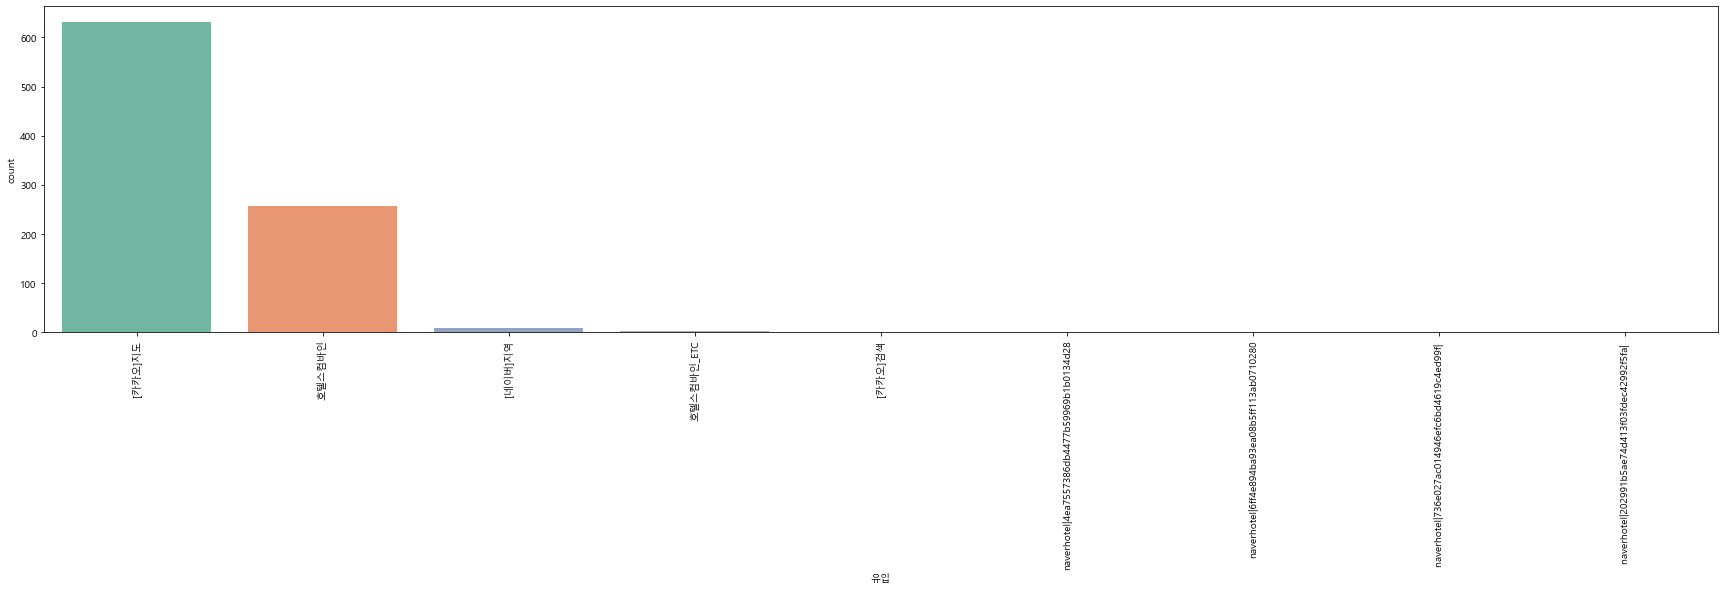

In [14]:
plt.figure(figsize=(30,6))
sns.countplot(x='유입', data=df, palette='Set2', order = df['유입'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- 경로

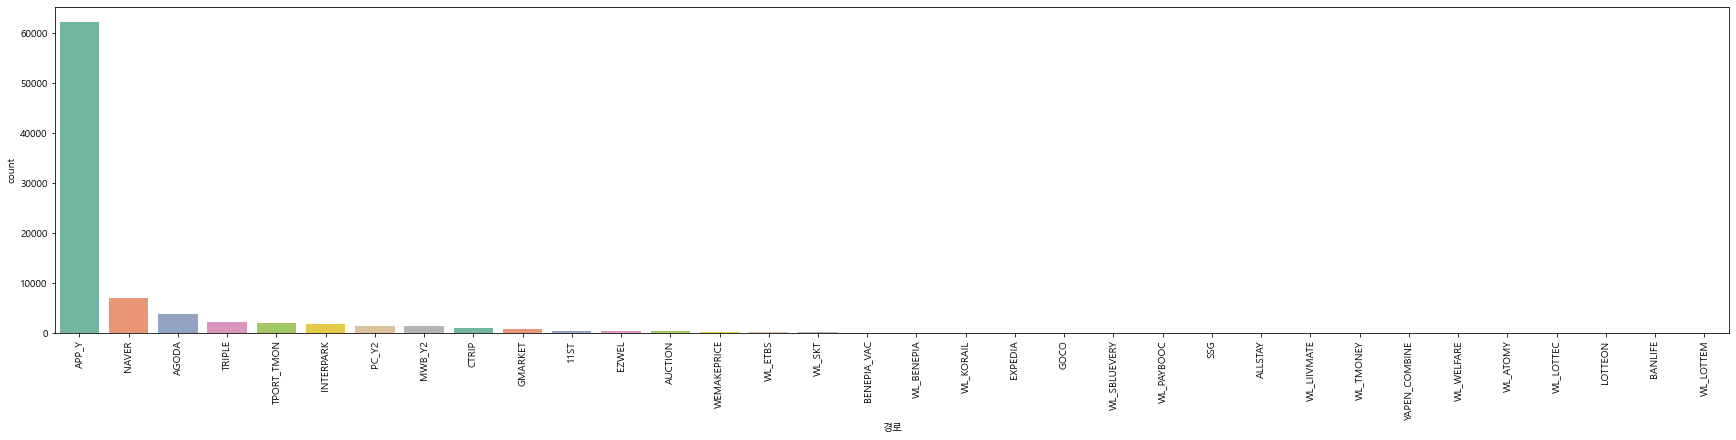

In [15]:
plt.figure(figsize=(30,6))
sns.countplot(x='경로', data=df, palette='Set2', order = df['경로'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- 쿠폰명

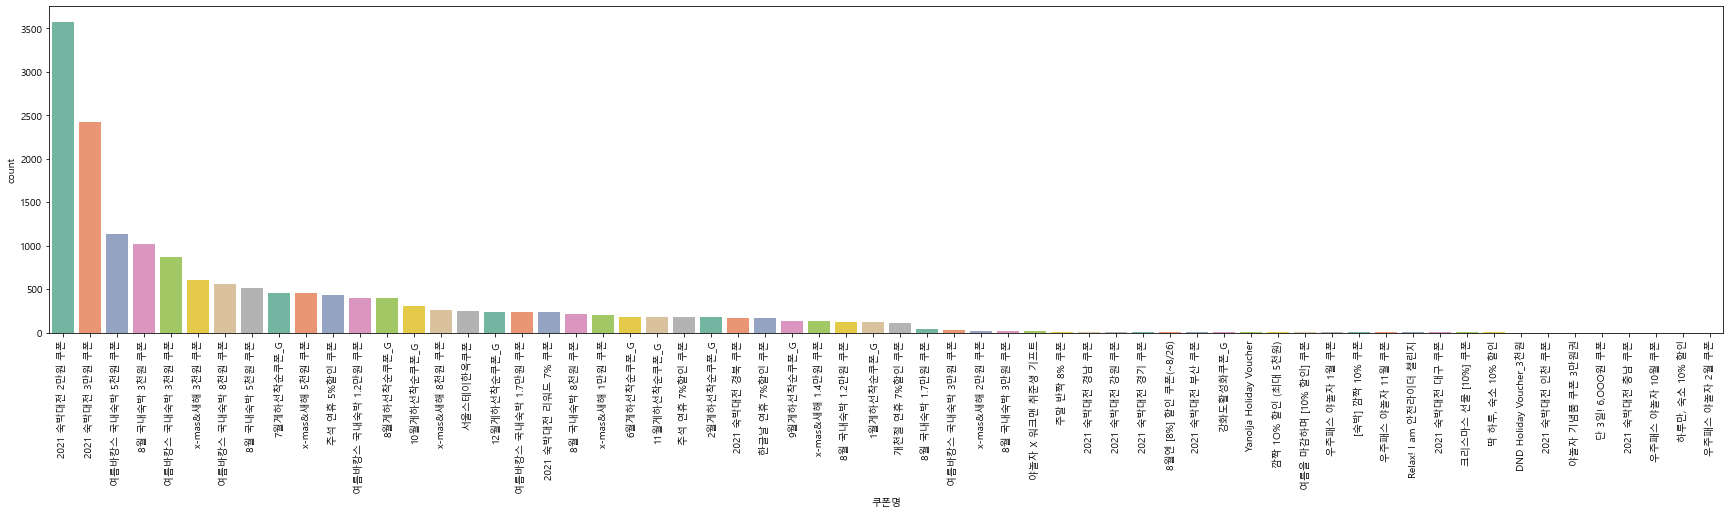

In [16]:
plt.figure(figsize=(30,6))
sns.countplot(x='쿠폰명', data=data, palette='Set2', order = data['쿠폰명'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- 고객정보 (상위 26명)

In [17]:
list_top20 = df['customer'].value_counts().keys()[:26] # 예약횟수 20 이상
df_top20 = df.query('customer in @list_top20')

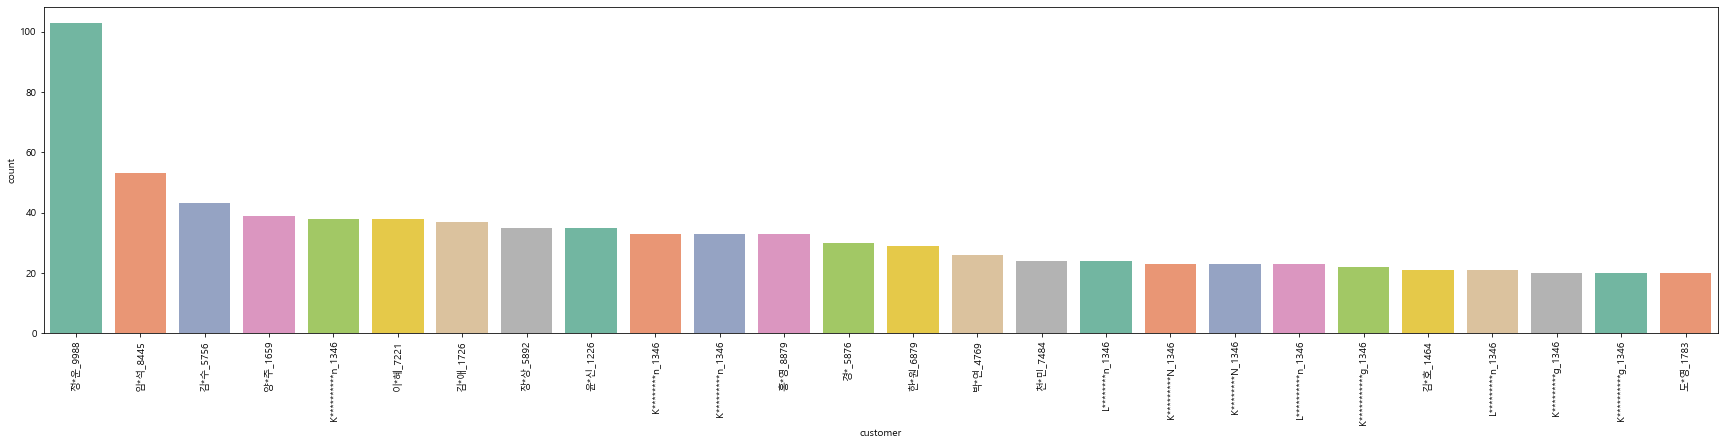

In [18]:
plt.figure(figsize=(30,6))
sns.countplot(x='customer', data=df_top20, palette='Set2', order=df_top20['customer'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Data Clustering

In [19]:
df_cluster = df.copy()
encoder(df_cluster, 'label')

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer
0,0,835,0,226,0,0,0,1,6857,1200,...,80000,76000,15,4000,0,0,0,-1,3,41298
1,1,335,0,523,0,4,4,0,1197,10051,...,23000,23000,-1,0,0,0,0,-1,1,1376
2,0,1144,0,2,0,0,0,0,762,10051,...,27000,27000,-1,0,0,0,0,-1,1,836
3,1,1005,0,296,0,21,21,1,8641,8844,...,45000,42393,-1,0,807,1800,0,-1,3,62989
4,1,1295,1,1147,0,2,3,1,7155,4831,...,26000,26000,-1,0,0,0,0,-1,3,45503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112690,1,83,0,3356,251,255,255,1,7375,835,...,82000,82000,-1,0,0,0,0,-1,14,52927
112691,1,278,0,1867,251,260,260,1,8592,2203,...,40000,40000,-1,0,0,0,0,-1,3,62857
112692,1,1111,0,2670,251,272,272,1,9352,6118,...,55000,55000,-1,0,0,0,0,-1,3,68126
112693,1,644,0,1593,251,261,261,1,7207,484,...,38000,38000,-1,0,0,0,0,-1,3,48076


- silhouette_score

In [110]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_new)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_new, labels, metric = 'euclidean'))

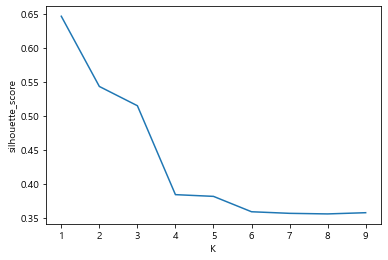

In [112]:
plt.plot(np.arange(1,10),sil)
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

- WSS

In [113]:
wss=[]
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k).fit(df_new)
    wss.append(km_k.inertia_)

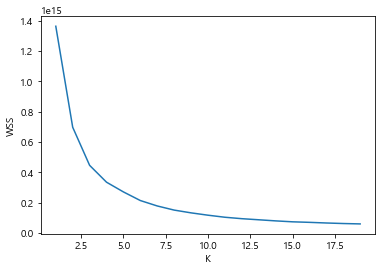

In [114]:
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

In [20]:
km = KMeans(n_clusters=4).fit(df_cluster)

df_cluster['cluster_km']=km.labels_
df_cluster['cluster_km']=df_cluster['cluster_km'].astype('category')
df['cluster_km'] = df_cluster['cluster_km']

df_cluster.cluster_km.value_counts()

1    56081
0    23282
2     5671
3      879
Name: cluster_km, dtype: int64

In [21]:
df_cluster['cluster_km'] = df_cluster['cluster_km'].astype(int)
df_cluster['cluster_mean'] = df_cluster.groupby(['customer'])[['cluster_km']].transform('mean') # 최빈값으로 고객별 군집을 통일
#df_cluster['cluster_mode'] = df_cluster.groupby(['customer'])[['cluster_km']].transform(lambda x: x.value_counts().idxmax()) # 최빈값으로 고객별 군집을 통일
df['cluster_mean'] = df_cluster['cluster_mean']

In [22]:
df[df['customer'] == df['customer'].value_counts().idxmax()]

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
18,N,명동 에어 호스텔,숙박,싱글룸,2021-06-01,2021-06-01,2021-06-02,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
391,N,명동 에어 호스텔,숙박,싱글룸,2021-06-02,2021-06-02,2021-06-03,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
806,N,명동 에어 호스텔,숙박,싱글룸,2021-06-03,2021-06-03,2021-06-04,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
1172,N,명동 더큐브 호텔형 게스트하우스,숙박,남성 도미토리,2021-06-04,2021-06-04,2021-06-05,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
1870,N,명동 더큐브 호텔형 게스트하우스,숙박,남성 도미토리,2021-06-06,2021-06-06,2021-06-07,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78689,N,서울 스텝인 명동,숙박,남성 6인 도미토리,2021-11-22,2021-11-22,2021-11-23,비회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
79226,N,서울 스텝인 명동,숙박,남성 6인 도미토리,2021-11-23,2021-11-23,2021-11-24,비회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
79578,N,명동 에어 호스텔,숙박,싱글룸,2021-11-24,2021-11-24,2021-11-25,회원,정*운,010****9988,...,2021 숙박대전 2만원 쿠폰,20000,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0
80249,N,서울 스텝인 명동,숙박,남성 6인 도미토리,2021-11-25,2021-11-25,2021-11-26,회원,정*운,010****9988,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*운_9988,1,1.0


In [23]:
df[df['customer'] == df['customer'].value_counts().idxmax()]['cluster_km'].value_counts()

1    103
0      0
2      0
3      0
Name: cluster_km, dtype: int64

In [24]:
df[df['customer'] == df['customer'].value_counts().keys()[1]]

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
11259,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-06-26,2021-06-26,2021-06-27,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,PC_Y2,임*석_8445,1,1.0
12421,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-06-28,2021-06-28,2021-06-29,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
13096,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-06-29,2021-06-29,2021-06-30,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
14036,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-01,2021-07-01,2021-07-02,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
14542,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-02,2021-07-02,2021-07-03,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
15196,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-03,2021-07-03,2021-07-04,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
15701,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-04,2021-07-04,2021-07-05,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
16228,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-05,2021-07-05,2021-07-06,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
16801,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-06,2021-07-06,2021-07-07,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0
17274,N,명동 킴스테이 게스트하우스 2호점,숙박,싱글룸,2021-07-07,2021-07-07,2021-07-08,회원,임*석,010****8445,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*석_8445,1,1.0


In [25]:
df[df['customer'] == df['customer'].value_counts().keys()[1]]['cluster_km'].value_counts()

1    53
0     0
2     0
3     0
Name: cluster_km, dtype: int64

In [26]:
df[df['customer'] == df['customer'].value_counts().keys()[2]]

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
325,N,서울 나루 호스텔,숙박,싱글룸,2021-06-01,2021-06-01,2021-06-02,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
5680,N,서울 나루 호스텔,숙박,싱글룸,2021-06-15,2021-06-15,2021-06-16,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
13261,N,서울 나루 호스텔,숙박,싱글룸,2021-06-29,2021-06-29,2021-06-30,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
17828,N,서울 나루 호스텔,숙박,싱글룸,2021-07-08,2021-07-08,2021-07-09,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
19398,N,서울 나루 호스텔,숙박,싱글룸,2021-07-12,2021-07-12,2021-07-13,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
22182,N,서울 나루 호스텔,숙박,싱글룸,2021-07-19,2021-07-19,2021-07-20,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
23013,N,서울 나루 호스텔,숙박,싱글룸,2021-07-21,2021-07-21,2021-07-22,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
23469,N,서울 나루 호스텔,숙박,싱글룸,2021-07-22,2021-07-22,2021-07-23,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
27935,N,서울 나루 호스텔,숙박,싱글룸,2021-08-02,2021-08-02,2021-08-03,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0
28397,N,서울 나루 호스텔,숙박,싱글룸,2021-08-03,2021-08-03,2021-08-04,회원,김*수,010****5756,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*수_5756,1,1.0


In [27]:
df[df['customer'] == df['customer'].value_counts().keys()[2]]['cluster_km'].value_counts()

1    43
0     0
2     0
3     0
Name: cluster_km, dtype: int64

In [28]:
df[df['customer'] == df['customer'].value_counts().keys()[3]]

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
749,N,야코리아 호스텔 강남점,숙박,6인 혼성 도미토리,2021-06-03,2021-06-03,2021-06-04,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
752,Y,야코리아 호스텔 강남점,연박,6인 혼성 도미토리,2021-06-03,2021-06-04,2021-06-07,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
769,N,홍대 코코아 게스트하우스,숙박,싱글룸,2021-06-03,2021-06-03,2021-06-04,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
1842,Y,야코리아 호스텔 강남점,연박,6인 혼성 도미토리,2021-06-06,2021-06-07,2021-06-11,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
5821,N,홍대 마마스앤파파스 게스트하우스,연박,도미토리(혼성8인),2021-06-16,2021-06-16,2021-06-21,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
8231,Y,홍대 마마스앤파파스 게스트하우스,연박,도미토리(혼성8인),2021-06-21,2021-06-21,2021-06-23,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
8637,Y,홍대 마마스앤파파스 게스트하우스,연박,도미토리(혼성8인),2021-06-21,2021-06-23,2021-06-28,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
12182,N,이태원 G게스트하우스,연박,혼성 4인 도미,2021-06-28,2021-06-28,2021-07-01,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
12223,N,홍대 마마스앤파파스 게스트하우스,숙박,도미토리(혼성8인),2021-06-28,2021-06-28,2021-06-29,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,APP_Y,양*주_1659,1,0.769231
15099,N,홍대 이노 게스트하우스 & 펍,연박,이코노미트윈,2021-07-03,2021-07-03,2021-07-08,회원,양*주,010****1659,...,NaN,0,0,0,예약완료,NaN,PC_Y2,양*주_1659,0,0.769231


In [30]:
df[df['customer'] == df['customer'].value_counts().keys()[3]]['cluster_km'].value_counts()

1    30
0     9
2     0
3     0
Name: cluster_km, dtype: int64

In [33]:
df[df['customer'] == df['customer'].value_counts().keys()[4]]

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
2,N,제주공항 싱글스토리 게스트하우스,숙박,"1-2인실 (1인기준, 1인추가시 추가요금발생)",2021-06-01,2021-06-01,2021-06-02,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,0.894737
2265,Y,경주 봉황 맨션,숙박,더블룸,2021-06-07,2021-06-23,2021-06-24,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,0.894737
6382,Y,춘천 91스테이,숙박,4인 가족실B,2021-06-17,2021-06-19,2021-06-20,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,0,0.894737
6958,Y,제주 유러 오션뷰스테이,숙박,8평,2021-06-18,2021-06-19,2021-06-20,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,0.894737
8189,Y,우도 소섬바당 게스트하우스,숙박,침대 2인실,2021-06-20,2021-07-30,2021-07-31,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,0.894737
9024,N,김치 부산 서면 게스트하우스,숙박,더블룸,2021-06-22,2021-06-22,2021-06-23,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,0.894737
15312,Y,제주 산방산애 펜션,숙박,"롱스테이 - 누루 28평(13시 퇴실, 21시 이후 당일예약 불가)",2021-07-03,2021-07-17,2021-07-18,비회원,K**********n,16441346,...,7월게하선착순쿠폰_G,4000,0,0,예약완료,NaN,AGODA,K**********n_1346,0,0.894737
17089,Y,부산 마루하우스,숙박,203호,2021-07-07,2021-07-10,2021-07-11,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,0,0.894737
19195,Y,전주 달달잠 한옥스테이,숙박,호호아틀리에 독채,2021-07-12,2021-07-17,2021-07-18,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,2,0.894737
22783,Y,제주 협재쉬멍놀멍 게스트하우스,숙박,2인실,2021-07-21,2021-07-23,2021-07-24,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,0,0.894737


In [34]:
df[df['customer'] == df['customer'].value_counts().keys()[4]]['cluster_km'].value_counts()

1    27
0     8
2     2
3     1
Name: cluster_km, dtype: int64

In [36]:
df['cluster_mean'] = round(df['cluster_mean'])
df['cluster_mean'] = df['cluster_mean'].astype(int)
df['cluster_mean']=df['cluster_mean'].astype('category')


In [81]:
df

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
0,N,제주 갤러리호텔 비,숙박,25평 패밀리,2021-06-01,2021-06-01,2021-06-02,회원,윤*규,010****1162,...,6월게하선착순쿠폰_G,4000,0,0,예약완료,NaN,APP_Y,윤*규_1162,0,0
1,Y,부산 세리인 게스트하우스,숙박,4인 남성 도미토리,2021-06-01,2021-06-05,2021-06-06,비회원,P************n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,P************n_1346,1,1
2,N,제주공항 싱글스토리 게스트하우스,숙박,"1-2인실 (1인기준, 1인추가시 추가요금발생)",2021-06-01,2021-06-01,2021-06-02,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,1
3,Y,제주 아모르 하우스,숙박,2인실 A동,2021-06-01,2021-06-22,2021-06-23,회원,천*효,010****8817,...,NaN,0,807,1800,예약완료,NaN,APP_Y,천*효_8817,1,1
4,Y,해운대 캔버스 호스텔,연박,남성 4인 도미토리,2021-06-01,2021-06-03,2021-06-05,회원,이*성,010****4798,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*성_4798,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112690,Y,경주 G HOUSE 미니호텔 & 게스트하우스,숙박,패밀리룸 한실,2022-02-07,2022-02-11,2022-02-12,회원,임*숙,010****0797,...,NaN,0,0,0,예약완료,NaN,MWB_Y2,임*숙_0797,0,0
112691,Y,명동 루프탑 호스텔,숙박,벙크트윈룸,2022-02-07,2022-02-16,2022-02-17,회원,천*람,010****2165,...,NaN,0,0,0,예약완료,NaN,APP_Y,천*람_2165,1,1
112692,Y,제주 하영하영 펜션&게스트하우스,숙박,오션 커플룸1,2022-02-07,2022-02-28,2022-03-01,회원,허*영,010****6085,...,NaN,0,0,0,예약완료,NaN,APP_Y,허*영_6085,1,1
112693,Y,을지로 레몬 게스트하우스,숙박,디럭스,2022-02-07,2022-02-17,2022-02-18,회원,이*은,010****0446,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*은_0446,1,1


# Clustering Analysis

- Cluster 0  
주로 가족, 친구들과 여행을 많이 다니는 유형으로 가장 많은 비중을 차지

In [82]:
df_cluster0 = df[df['cluster_mean']==0]
df_cluster0

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
0,N,제주 갤러리호텔 비,숙박,25평 패밀리,2021-06-01,2021-06-01,2021-06-02,회원,윤*규,010****1162,...,6월게하선착순쿠폰_G,4000,0,0,예약완료,NaN,APP_Y,윤*규_1162,0,0
16,Y,경주 봉황 맨션,숙박,더블룸,2021-06-01,2021-06-04,2021-06-05,회원,최*철,010****6648,...,NaN,0,0,3000,예약완료,NaN,APP_Y,최*철_6648,0,0
17,Y,서귀포 일레인 호텔,연박,디럭스킹,2021-06-01,2021-07-21,2021-07-23,회원,채*화,010****1347,...,NaN,0,0,0,예약완료,NaN,APP_Y,채*화_1347,0,0
19,Y,제주 포엠하우스 펜션&게스트하우스,연박,12평 커플룸(바다전망),2021-06-01,2021-06-14,2021-06-16,비회원,k********m,16441346,...,NaN,0,0,0,예약완료,NaN,CTRIP,k********m_1346,0,0
27,Y,양평 휴 캠핑장,숙박,카라반3,2021-06-01,2021-06-05,2021-06-06,회원,임*수,010****3661,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*수_3661,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112668,Y,경주 한옥 황남디귿집,숙박,2인실 온돌룸,2022-02-07,2022-02-07,2022-02-08,비회원,유*성,010****1486,...,NaN,0,0,0,예약완료,NaN,APP_Y,유*성_1486,0,0
112672,Y,새연 글램핑&카라반 포천점,숙박,프리미엄 폴딩도어 카라반,2022-02-07,2022-02-10,2022-02-11,비회원,김*준,010****4036,...,NaN,0,0,0,예약완료,NaN,WL_SKT,김*준_4036,0,0
112675,Y,제주 산방산탄산온천펜션,숙박,탄산온천펜션 4인실 20평(탄산온천 2회 이용 할인권 판매),2022-02-07,2022-02-07,2022-02-08,회원,정*,010****3029,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*_3029,0,0
112683,Y,성산에오거들랑 게스트하우스,연박,가족룸/커플룸2 (22시입실마감),2022-02-07,2022-02-15,2022-02-17,비회원,박*숙,010****2766,...,NaN,0,0,0,예약완료,NaN,NAVER,박*숙_2766,0,0


In [83]:
df_cluster0['업체명'].value_counts()

경주 봉황 맨션          544
경주 한옥 황남디귿집       473
제주 스테이 어라운드       346
경주 동행스테이          322
안동 치암고택           316
                 ... 
강릉 슈밍 게스트하우스        1
제주 더베이 리조트          1
제주 협재서쪽 게스트하우스      1
동대문 카림 게스트하우스       1
통영 원게스트하우스          1
Name: 업체명, Length: 1115, dtype: int64

In [114]:
df_cluster0['업체명'].value_counts()[10:30]

포천 채움 글램핑&카라반(관광농원)         221
전주 한옥미담 스테이                 212
양평 글램핑&카라반                  205
전주 교동살래 한옥스테이               192
속초 위드유 게스트하우스               174
전주 이화고택 전통체험관               160
속초 밤하늘 글램핑                  159
홍천 쉐르빌 글램핑                  158
속초 하루 게스트하우스                156
봉화 망와고택                     154
목포 38번가 게스트하우스              152
경주 신라고택 한옥스테이               150
경주 서라벌 한옥관                  139
제주 협재쉬멍놀멍 게스트하우스            135
속초 노도 스테이                   134
전주 별자리 한옥스테이                133
K-그랜드 호스텔 강남1               133
경주 라온 한옥스테이                 131
고성 말보로맨 카라반 오토캠핑장           124
경주 G HOUSE 미니호텔 & 게스트하우스    120
Name: 업체명, dtype: int64

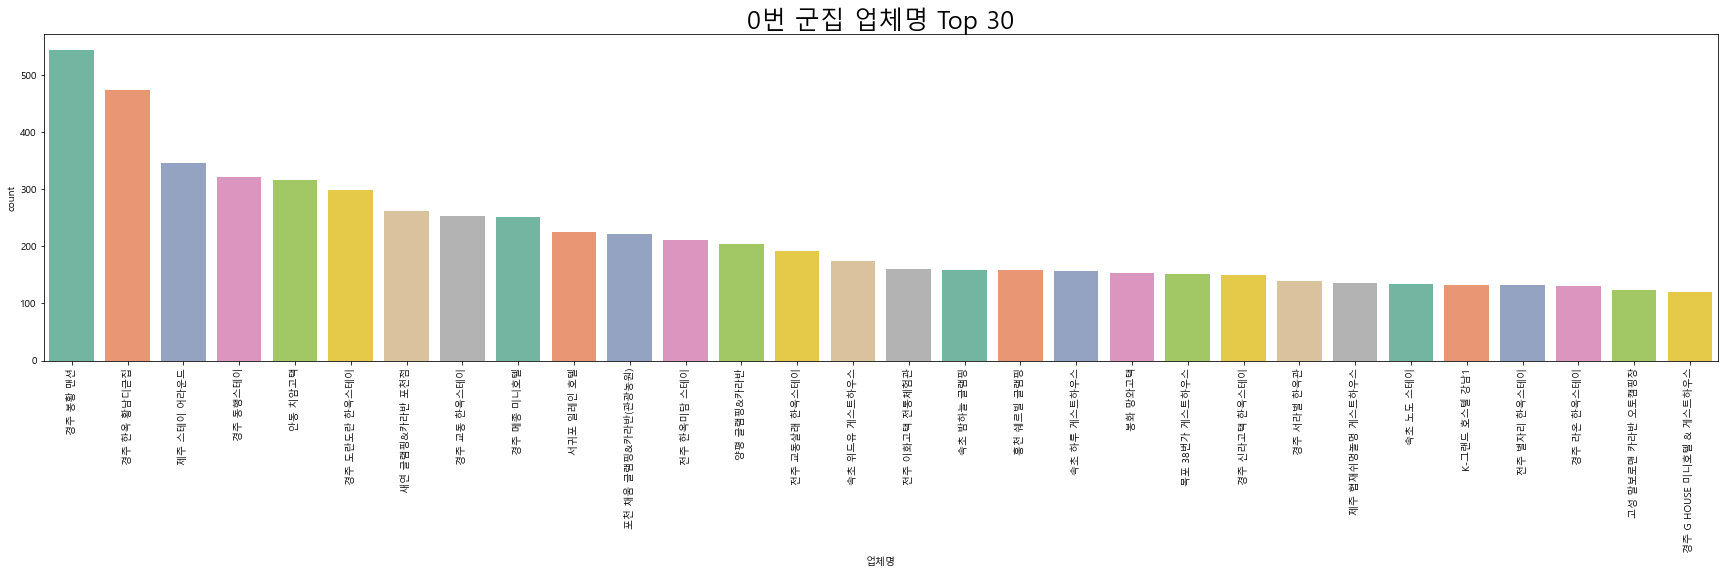

In [84]:
cluster0_top30 = df_cluster0['업체명'].value_counts().keys()[:30]
df0_top30 = df_cluster0.query('업체명 in @cluster0_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='업체명', data=df0_top30, palette='Set2', order=df0_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('0번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [85]:
df_cluster0['객실타입'].value_counts()

더블룸                                            876
트윈룸                                            762
트리플룸                                           415
패밀리룸                                           391
2인실                                            379
                                              ... 
백대리                                              1
ROOM A - 청귤                                      1
정                                                1
Quadruple Room                                   1
벙크트윈룸 - 필스테이PKG(비건 세럼&토너, 바디스크럽, 여행엽서 등 6종)      1
Name: 객실타입, Length: 2548, dtype: int64

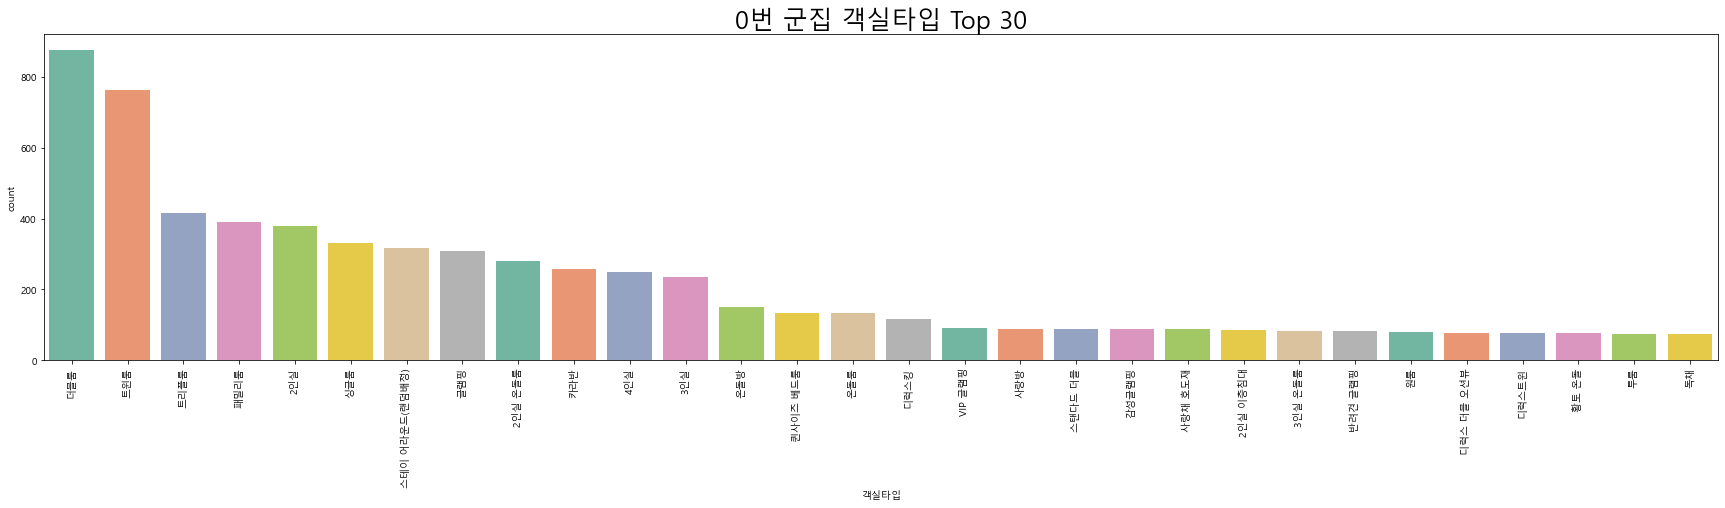

In [86]:
cluster0_top30 = df_cluster0['객실타입'].value_counts().keys()[:30]
df0_top30 = df_cluster0.query('객실타입 in @cluster0_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df0_top30, palette='Set2', order=df0_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('0번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [105]:
df_cluster0['미리예약'].value_counts(normalize=True)

Y    0.864531
N    0.135469
Name: 미리예약, dtype: float64

In [104]:
df_cluster0['상품'].value_counts(normalize=True)

숙박    0.775986
연박    0.224014
Name: 상품, dtype: float64

- Cluster 1  
눈에 띄게 게스트하우스가 많은 것이 확인  
혼자서 숙박하시는 분들도 포함

In [87]:
df_cluster1 = df[df['cluster_mean']==1]
df_cluster1

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
1,Y,부산 세리인 게스트하우스,숙박,4인 남성 도미토리,2021-06-01,2021-06-05,2021-06-06,비회원,P************n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,P************n_1346,1,1
2,N,제주공항 싱글스토리 게스트하우스,숙박,"1-2인실 (1인기준, 1인추가시 추가요금발생)",2021-06-01,2021-06-01,2021-06-02,비회원,K**********n,16441346,...,NaN,0,0,0,예약완료,NaN,AGODA,K**********n_1346,1,1
3,Y,제주 아모르 하우스,숙박,2인실 A동,2021-06-01,2021-06-22,2021-06-23,회원,천*효,010****8817,...,NaN,0,807,1800,예약완료,NaN,APP_Y,천*효_8817,1,1
4,Y,해운대 캔버스 호스텔,연박,남성 4인 도미토리,2021-06-01,2021-06-03,2021-06-05,회원,이*성,010****4798,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*성_4798,1,1
5,Y,제주 온더스톤 게스트하우스 2호점,숙박,4인 남성 도미토리,2021-06-01,2021-06-18,2021-06-19,비회원,y********i,16441346,...,NaN,0,0,0,예약완료,NaN,CTRIP,y********i_1346,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112689,Y,전주 별자리 한옥스테이,숙박,"별똥별 - 디스커버원PKG(복층/ 시그니처 블랜딩티, 흡한속건양말, 비건세럼 등 5종)",2022-02-07,2022-02-23,2022-02-24,회원,권*진,010****2904,...,NaN,0,0,0,예약완료,NaN,APP_Y,권*진_2904,1,1
112691,Y,명동 루프탑 호스텔,숙박,벙크트윈룸,2022-02-07,2022-02-16,2022-02-17,회원,천*람,010****2165,...,NaN,0,0,0,예약완료,NaN,APP_Y,천*람_2165,1,1
112692,Y,제주 하영하영 펜션&게스트하우스,숙박,오션 커플룸1,2022-02-07,2022-02-28,2022-03-01,회원,허*영,010****6085,...,NaN,0,0,0,예약완료,NaN,APP_Y,허*영_6085,1,1
112693,Y,을지로 레몬 게스트하우스,숙박,디럭스,2022-02-07,2022-02-17,2022-02-18,회원,이*은,010****0446,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*은_0446,1,1


In [88]:
df_cluster1['업체명'].value_counts()

제주 미소 게스트하우스          852
속초 하루 게스트하우스          735
홍대 마마스앤파파스 게스트하우스     615
해운대 Y 게스트하우스          564
제주 대동호텔               517
                     ... 
전주 박가네 한옥스테이            1
스윗서울 게스트하우스             1
화천 다가가다 한옥스테이           1
서귀포 초가인 inn 게스트하우스      1
고성 시찬스 게스트하우스           1
Name: 업체명, Length: 1077, dtype: int64

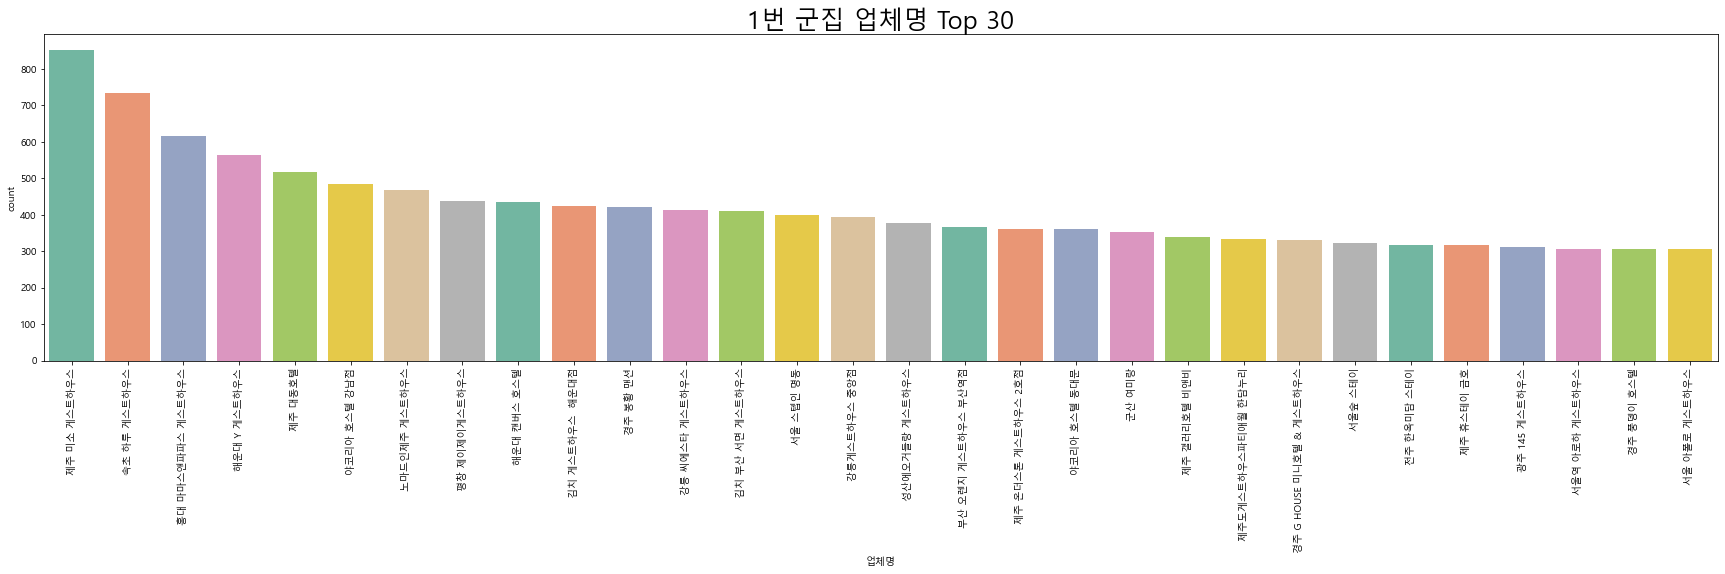

In [89]:
cluster1_top30 = df_cluster1['업체명'].value_counts().keys()[:30]
df1_top30 = df_cluster1.query('업체명 in @cluster1_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='업체명', data=df1_top30, palette='Set2', order=df1_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('1번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [90]:
df_cluster1['객실타입'].value_counts()

더블룸              3238
싱글룸              2830
트윈룸              2328
2인실               859
4인 남성 도미토리        750
                 ... 
여자(여 6인 도미토리)       1
가족 2, 3             1
오션커플룸               1
특가-몽실               1
더블(303호)            1
Name: 객실타입, Length: 2530, dtype: int64

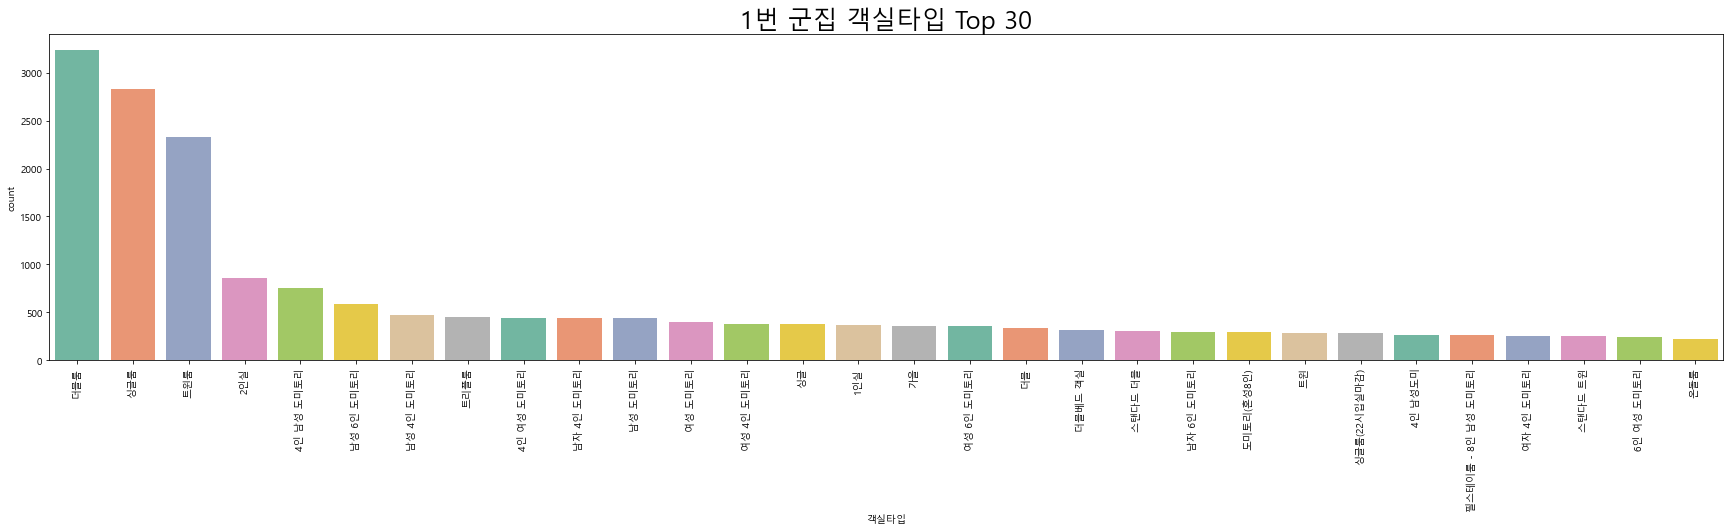

In [91]:
cluster1_top30 = df_cluster1['객실타입'].value_counts().keys()[:30]
df1_top30 = df_cluster1.query('객실타입 in @cluster1_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df1_top30, palette='Set2', order=df1_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('1번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [106]:
df_cluster1['미리예약'].value_counts(normalize=True)

Y    0.692225
N    0.307775
Name: 미리예약, dtype: float64

In [107]:
df_cluster1['상품'].value_counts(normalize=True)

숙박    0.905803
연박    0.094197
Name: 상품, dtype: float64

- Cluster 2  
글램핑이 많은 것을 확인

In [92]:
df_cluster2 = df[df['cluster_mean']==2]
df_cluster2

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
21,Y,경주 메종 미니호텔,연박,트윈룸,2021-06-01,2021-06-04,2021-06-06,비회원,김*경,010****6534,...,NaN,0,0,0,예약완료,NaN,EZWEL,김*경_6534,2,2
24,Y,포천 채움 글램핑&카라반(관광농원),숙박,글램핑,2021-06-01,2021-06-12,2021-06-13,회원,김*주,010****8797,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*주_8797,2,2
50,Y,경주 타베르나 한옥스테이,숙박,ROOM4,2021-06-01,2021-06-12,2021-06-13,회원,김*성,010****2560,...,NaN,0,11838,0,예약완료,NaN,APP_Y,김*성_2560,2,2
65,Y,전주 꽃자리 한옥스테이,숙박,자운영,2021-06-01,2021-06-05,2021-06-06,회원,한*환,010****1424,...,NaN,0,0,5000,예약완료,NaN,APP_Y,한*환_1424,2,2
69,Y,제주 달비치 게스트하우스,연박,2인실,2021-06-01,2021-06-23,2021-06-25,회원,김*윤,010****6605,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*윤_6605,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112585,Y,제주 휴안스테이,연박,스탠다드 트윈,2022-02-06,2022-02-09,2022-02-13,비회원,이*수,010****3870,...,NaN,0,0,0,예약완료,NaN,WL_LIIVMATE,이*수_3870,2,2
112662,Y,전주 한옥미담 스테이,연박,달님,2022-02-07,2022-02-26,2022-02-28,회원,한*선,010****9104,...,NaN,0,0,0,예약완료,NaN,APP_Y,한*선_9104,2,2
112663,Y,제주 퓨어스테이오션 리조트,연박,스탠다드 트윈,2022-02-07,2022-02-12,2022-02-15,회원,김*서,010****2699,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*서_2699,2,2
112674,Y,부산 광안리 오션투헤븐 호텔,숙박,로얄 스위트 오션,2022-02-07,2022-02-12,2022-02-13,회원,김*철,010****7728,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*철_7728,2,2


In [93]:
df_cluster2['업체명'].value_counts()

새연 글램핑&카라반 포천점         183
포천 채움 글램핑&카라반(관광농원)    139
경주 한옥 황남디귿집            133
경주 봉황 맨션               116
양평 글램핑&카라반             112
                      ... 
목포 달꾸메 게스트하우스            1
경주 옥산서원길 게스트하우스          1
서울 필 하우스                 1
남해 편백황토 한옥스테이            1
제주 팀버하우스                 1
Name: 업체명, Length: 820, dtype: int64

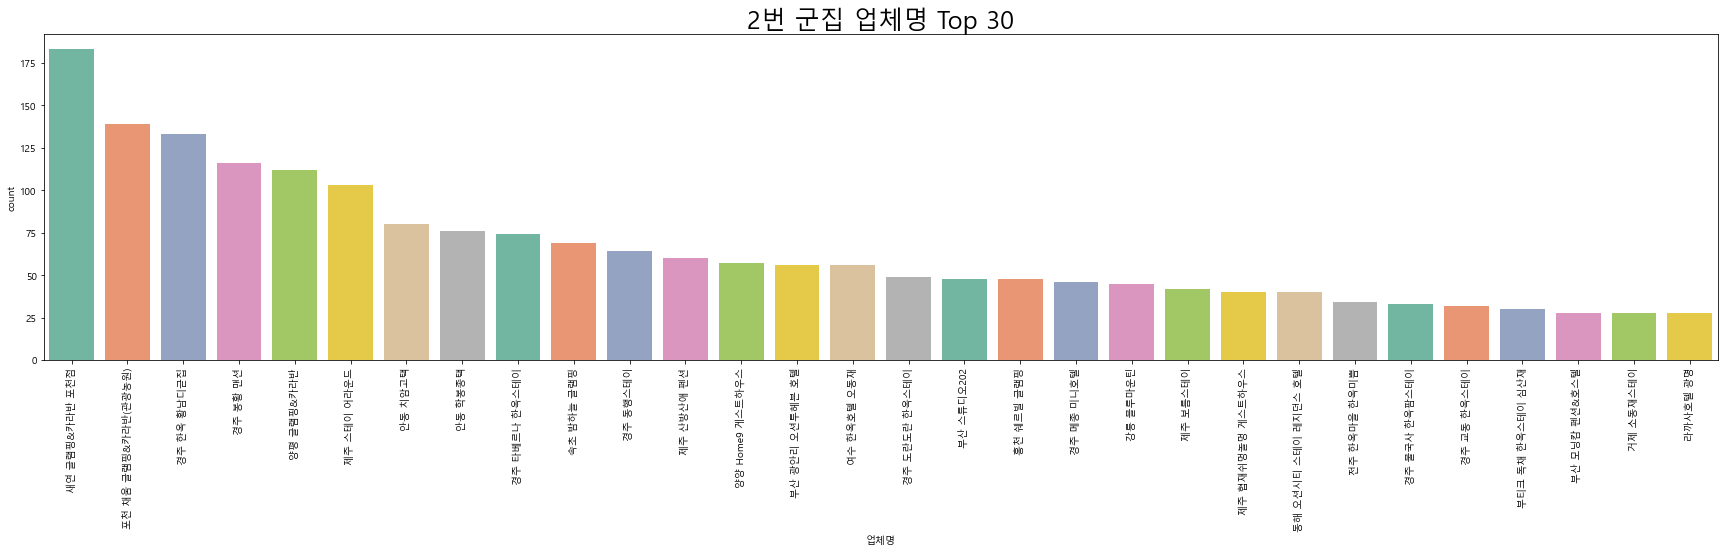

In [94]:
cluster2_top30 = df_cluster2['업체명'].value_counts().keys()[:30]
df2_top30 = df_cluster2.query('업체명 in @cluster2_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='업체명', data=df2_top30, palette='Set2', order=df2_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('2번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [95]:
df_cluster2['객실타입'].value_counts()

카라반                    184
더블룸                    137
독채                     114
스테이 어라운드(랜덤배정)          97
트윈룸                     96
                      ... 
여자 도미토리 1박+보드렌탈          1
편백황토방                    1
매직카펫라이드 서프 패키지(더블룸)      1
디럭스 더블                   1
트윈룸 (22시 입실마감)           1
Name: 객실타입, Length: 1379, dtype: int64

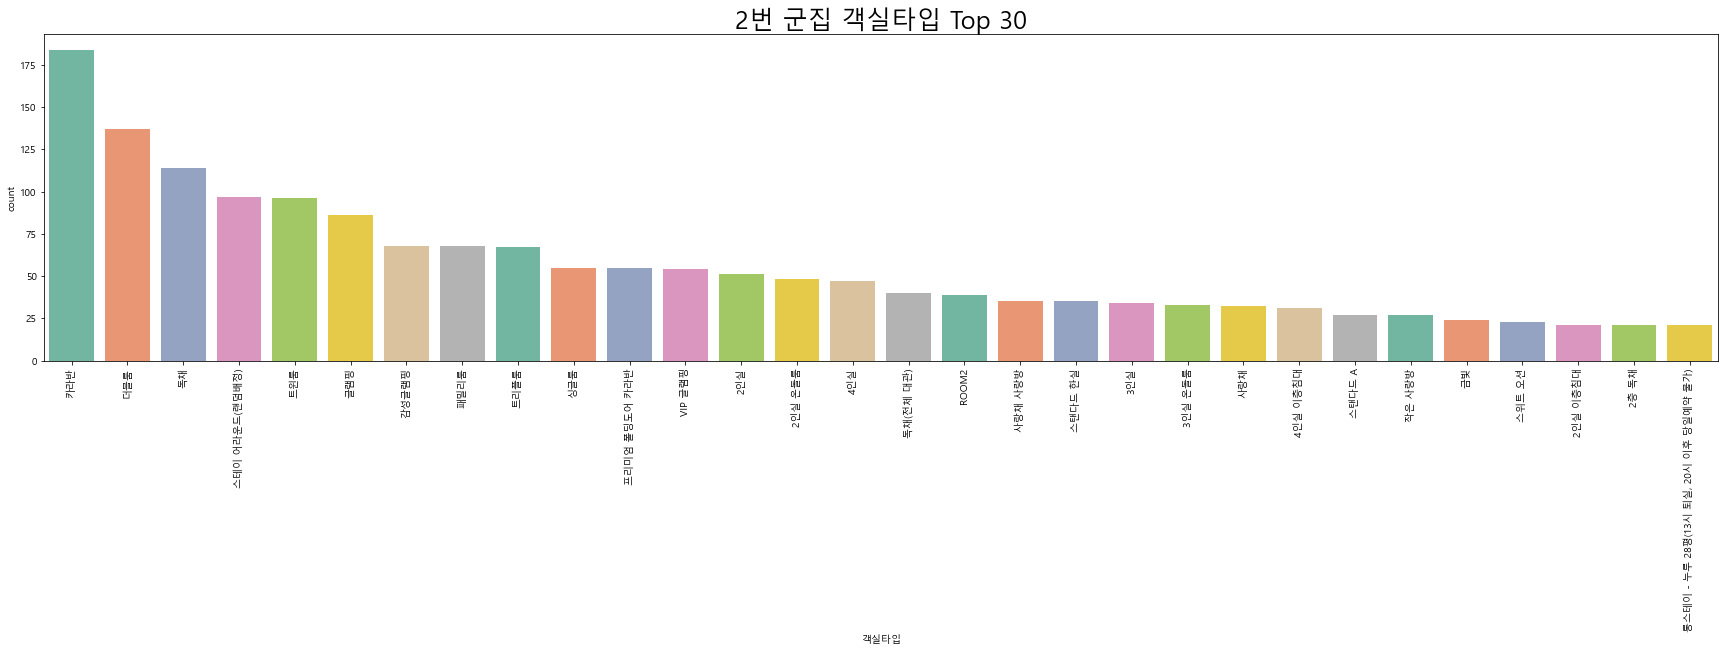

In [96]:
cluster2_top30 = df_cluster2['객실타입'].value_counts().keys()[:30]
df2_top30 = df_cluster2.query('객실타입 in @cluster2_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df2_top30, palette='Set2', order=df2_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('2번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [108]:
df_cluster2['미리예약'].value_counts(normalize=True)

Y    0.939766
N    0.060234
Name: 미리예약, dtype: float64

In [109]:
df_cluster2['상품'].value_counts(normalize=True)

연박    0.51037
숙박    0.48963
Name: 상품, dtype: float64

- Cluster 3  
한옥스테이, 독채가 많음

In [97]:
df_cluster3 = df[df['cluster_mean']==3]
df_cluster3

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,cluster_mean
85,Y,포항 발라스 미니호텔&게스트하우스,연박,트윈룸,2021-06-01,2021-06-28,2021-07-03,회원,김*희,010****7852,...,NaN,0,0,0,예약완료,NaN,APP_Y,김*희_7852,3,3
351,Y,청송 여인숙 펜션&호스텔,숙박,1층,2021-06-02,2021-06-05,2021-06-06,비회원,이*안,010****0915,...,NaN,0,0,0,예약완료,NaN,NAVER,이*안_0915,3,3
455,Y,제주 포엠하우스 펜션&게스트하우스,연박,42평 패밀리룸(바다전망),2021-06-02,2021-06-11,2021-06-13,비회원,K*************I,16441346,...,NaN,0,0,0,예약완료,NaN,CTRIP,K*************I_1346,3,3
523,Y,서촌 비빔밥 한옥스테이,숙박,독채,2021-06-02,2021-06-04,2021-06-05,비회원,이*미,010****8565,...,NaN,0,0,0,예약완료,NaN,PC_Y2,이*미_8565,3,3
720,Y,평창 고려궁 한옥호텔,연박,인천·한강·휴휴·시가,2021-06-03,2021-06-11,2021-06-13,회원,전*두,010****8618,...,NaN,0,0,0,예약완료,NaN,APP_Y,전*두_8618,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111548,Y,함덕 535 독채민박,연박,독채,2022-02-04,2022-02-22,2022-02-25,비회원,주*영,010****5969,...,NaN,0,0,0,예약완료,NaN,GMARKET,주*영_5969,3,3
112101,Y,제주 밀레니엄빌 스테이,연박,복층,2022-02-05,2022-03-08,2022-03-13,회원,이*형,010****6822,...,NaN,0,0,5000,예약완료,NaN,APP_Y,이*형_6822,3,3
112269,Y,제주 합전스테이,숙박,독채,2022-02-05,2022-02-27,2022-02-28,비회원,이*나,010****7414,...,NaN,0,0,0,예약완료,NaN,NAVER,이*나_7414,3,3
112517,Y,서울 꼬모까사 레지던스,연박,꼬모까사 - 14(2인실 퀸),2022-02-06,2022-02-07,2022-02-13,회원,홍*지,010****4453,...,NaN,0,0,0,예약완료,NaN,APP_Y,홍*지_4453,3,3


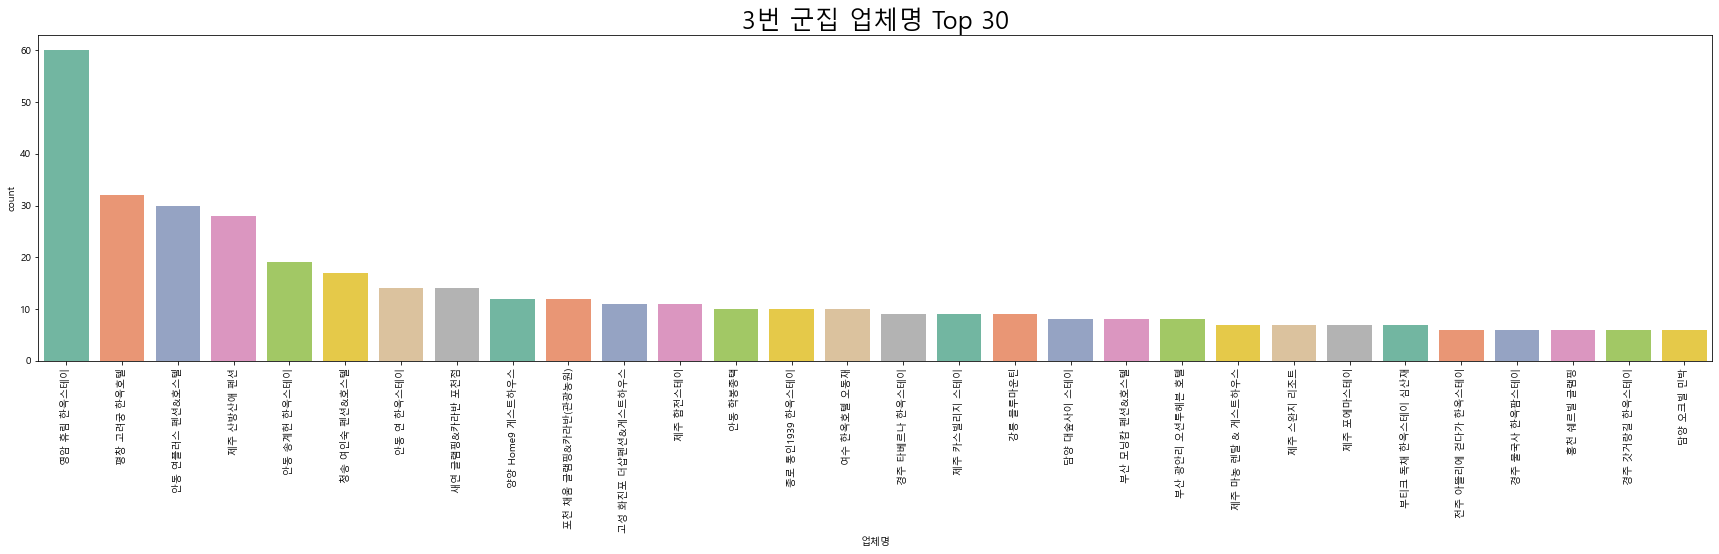

In [98]:
cluster3_top30 = df_cluster3['업체명'].value_counts().keys()[:30]
df3_top30 = df_cluster3.query('업체명 in @cluster3_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='업체명', data=df3_top30, palette='Set2', order=df3_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('3번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [99]:
df_cluster3['업체명'].value_counts()

영암 휴림 한옥스테이           60
평창 고려궁 한옥호텔           32
안동 연플러스 펜션&호스텔        30
제주 산방산애 펜션            28
안동 송계헌 한옥스테이          19
                      ..
순천 게스트하우스 느림           1
봉화 춘양목 호스텔             1
제주 오르또 펜션 & 게스트하우스     1
군산 여미랑                 1
울산 달빛은하수 게스트하우스        1
Name: 업체명, Length: 253, dtype: int64

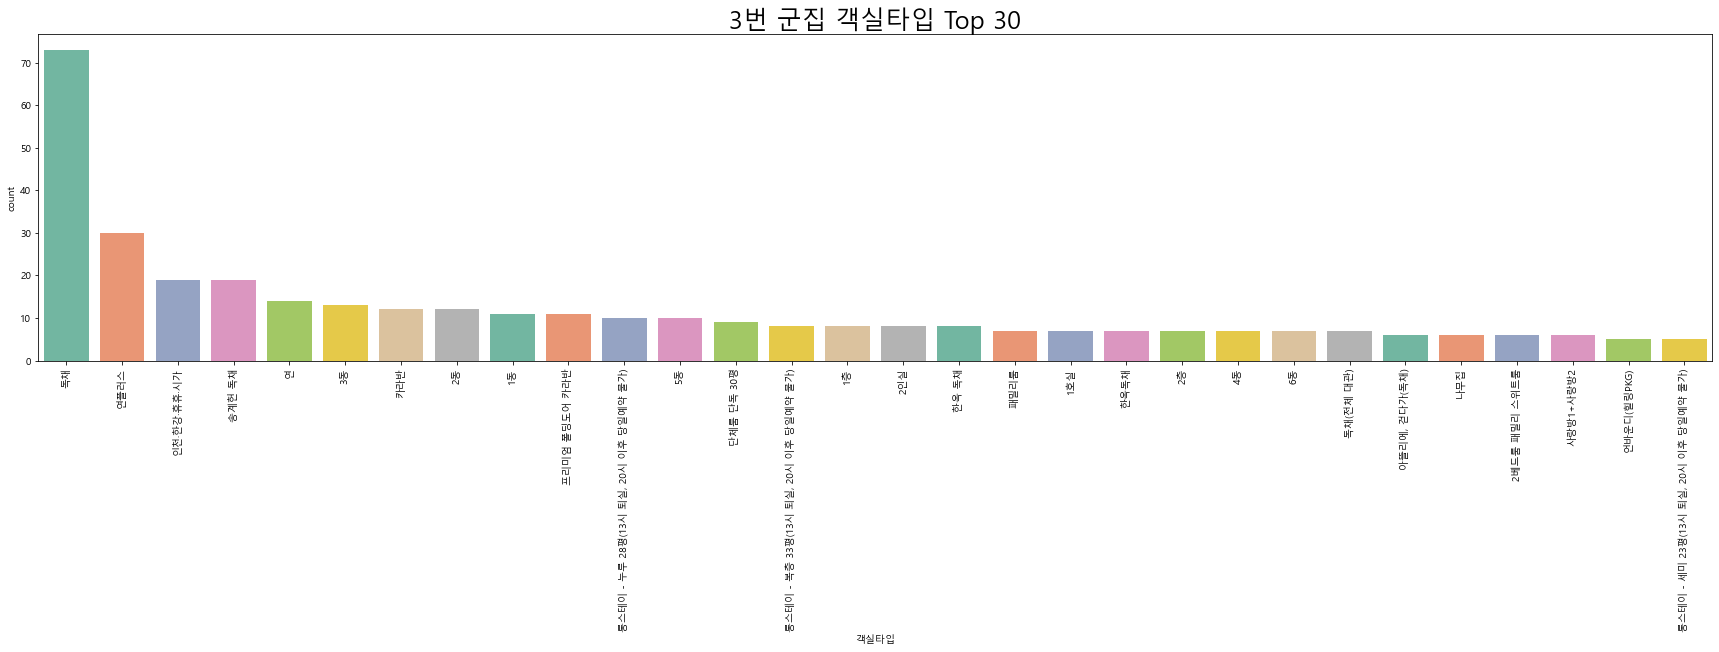

In [100]:
cluster3_top30 = df_cluster3['객실타입'].value_counts().keys()[:30]
df3_top30 = df_cluster3.query('객실타입 in @cluster3_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df3_top30, palette='Set2', order=df3_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('3번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [101]:
df_cluster3['객실타입'].value_counts()

독채                  73
연플러스                30
인천·한강·휴휴·시가         19
송계헌 독채              19
연                   14
                    ..
가족실 (22시입실마감)        1
국화                   1
윤슬                   1
천마총룸                 1
꼬모까사 - 14(2인실 퀸)     1
Name: 객실타입, Length: 299, dtype: int64

In [110]:
df_cluster3['미리예약'].value_counts(normalize=True)

Y    0.972806
N    0.027194
Name: 미리예약, dtype: float64

In [111]:
df_cluster3['상품'].value_counts(normalize=True)

연박    0.590853
숙박    0.409147
Name: 상품, dtype: float64